**Justin Vecchio**

**DTSA 5509 Supervised Learning Final Project**

The Titanic disaster resulted in the deaths of over 1,500 passengers and crew after the ship struck an iceberg. Using past data, I aim to predict whether a passenger survived or not based on features such as age, gender, and ticket class!

I used classification as a supervised learning type, and used logistic regression, random forest, and XGBoost algorithms in my code.

The goal of this project was to be able to predict whether or not a person would survive based on multiple factors, mentioned previously.

My dataset came from Kaggle. I used training data (train.csv) which contained 891 samples, and testing data (test.csv) which contained 418 samples. These datasets captured categorical data such as sex, embarked, and pclass. It also contained numerical data such as age, fare, sibsp, and parch. Finally, it contained a target variable of survived, with a bool value. Zero meaning the person did not survive, one meaning they did.

**EDA**

I had to first load the libraries and my datasets from Kaggle, which I uploaded directly into Google Collab's enviornment.

In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train.csv")

# Check first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I checked for any missing values to ensure that my data was clean. As you can visualize, sex had 177 missing values, cabin had 687 missing values, and embarked had two missing values:

In [22]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In order to handle the missing values, I filled age with the median values, to ensure I can still use the remaining data in the rows. I filled in null cells on embarked with the mode, and I did drop the values in cabin that were null, since they were a small ratio of the dataset:

In [23]:
df.loc[:, "Age"] = df["Age"].fillna(df["Age"].median())
df.loc[:, "Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.drop("Cabin", axis=1, inplace=True)


Below, I calculated the survival rate by gender. As you can see, women had a much higher survival rate compared to men.

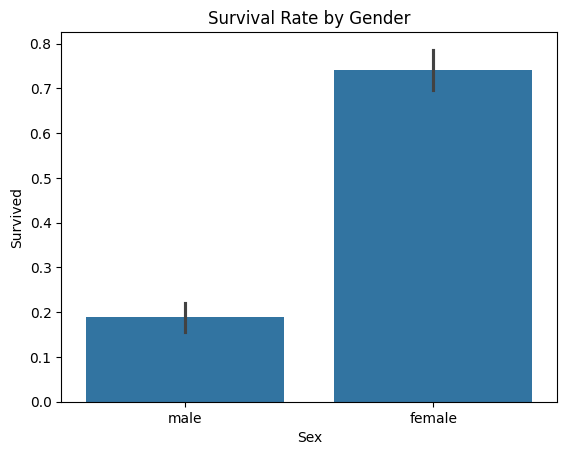

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()


Below, I visualized the survival rate by class. As you can see, passengers that were in first class had a much higher survival rate.

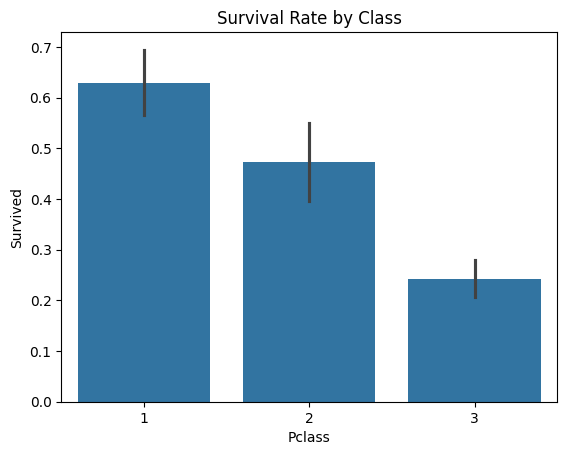

In [25]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Class")
plt.show()


I then converted the categorical elements into boolean values to simplify and preprocess the data. As you can see, I updated male to 0 and female to 1 for the collumn Sex.

In [26]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)


I found these fields unnecessary, however, a future idea may be to idenify patters with name to understand where passengers could have been from and what race/ethnicity was more likely to survive.

In [27]:
df.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)


At this point, I train and test splitted.

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Here is where I performed logistic regression, which resulting in an accuracy of approx. 81%.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.81


Here is where I created and used a  random forrest algorithm, which resulted in an accuracy of about 81%. I also performed an XGBoost algorithm which resulted in an accuracy rate of approx. 82%.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"XGBoost Accuracy: {xgb_acc:.2f}")


Random Forest Accuracy: 0.81
XGBoost Accuracy: 0.82


Following the algorithms, I wanted to compare each model's performance. As you can see, random forest and XGBoost performed better than logistic regression.

In [ ]:
models = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [log_acc, rf_acc, xgb_acc]
})
models.sort_values(by="Accuracy", ascending=False)


In order to calculate the top factors that could have impacted survival on the titanic ship, I intorduced a feature importance algorithm. As you can see, the top factors that impacted survival are sex, Pclass, Fare, and Age.

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.show()


My analysis of the titanic survival data revealed some insights into the factors influencing the passenger survival. One of the most surprising findings to me was the impact of gender and passenger class on survival rates. Women had a much higher likelihood of survival compared to men, which reminded me of the women and children first saying on an airplane. Also, first-class passengers had a much better chance of survival than those in second and third class, suggesting that socio-economic status played some kind of role in access to lifeboats and rescue efforts, maybe where they were on the ship.

In terms of model performance, XGBoost proved to be the most effective model, achieving approximately 82% accuracy in predicting passenger survival. That outperformed logistic regression, which had slightly lower accuracy, probably due to its inability to capture non-linear relationships in my data. The feature importance analysis from the Random Forest model confirmed that Sex, Passenger Class, Fare, and Age were the most influential features in determining survival outcomes.

There are several areas where the model and analysis could be improved. By incorporating family size as a new feature or extracting  information from passenger names could provide additional predictive power and could also provide insight on my idea of predicting ethnicity.

I look forward in the future to focus on refining feature selection and testing additional machine learning techniques to improve accuracy. Thank you.